In [1]:
import numpy as np

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
from matplotlib import pyplot as plt

To sample points on a sphere, it is important to have the coordinate
$$
x = \cos \phi \sin \theta,\quad y = \sin \phi \sin \theta,\quad z = \cos \theta, \quad \theta\in [0,\pi], \phi\in [0,2\pi]
$$

And we also know that the area spanned by $dS = \sin\theta d\theta d\phi$. Therefore we can at first sample the $\theta$ according to pdf $f(\theta,\phi) = \frac12\sin \theta$, and then $\phi \sim 2\pi\xi$, and then transform it back into $x,y,z$ 

In [4]:
def sampling_sphere():
    # sampling theta, using a simple rejection sampling. 
    theta = -1
    while theta < 0:
        _ = np.random.uniform(0,np.pi)
        if np.random.uniform() <= np.sin(_)/2: 
            theta = _
    
    # sampling phi
    phi = np.random.uniform(0,2*np.pi)

    x = np.cos(phi)*np.sin(theta)
    y = np.sin(phi)*np.sin(theta)
    z = np.cos(theta)

    return (x,y,z)

def sampling_sphere_n(N=100):
    return np.array([sampling_sphere() for i in range(N)]).T

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

# Generate points
pts = sampling_sphere_n(5000)

xx = pts[0]
yy = pts[1]
zz = pts[2]


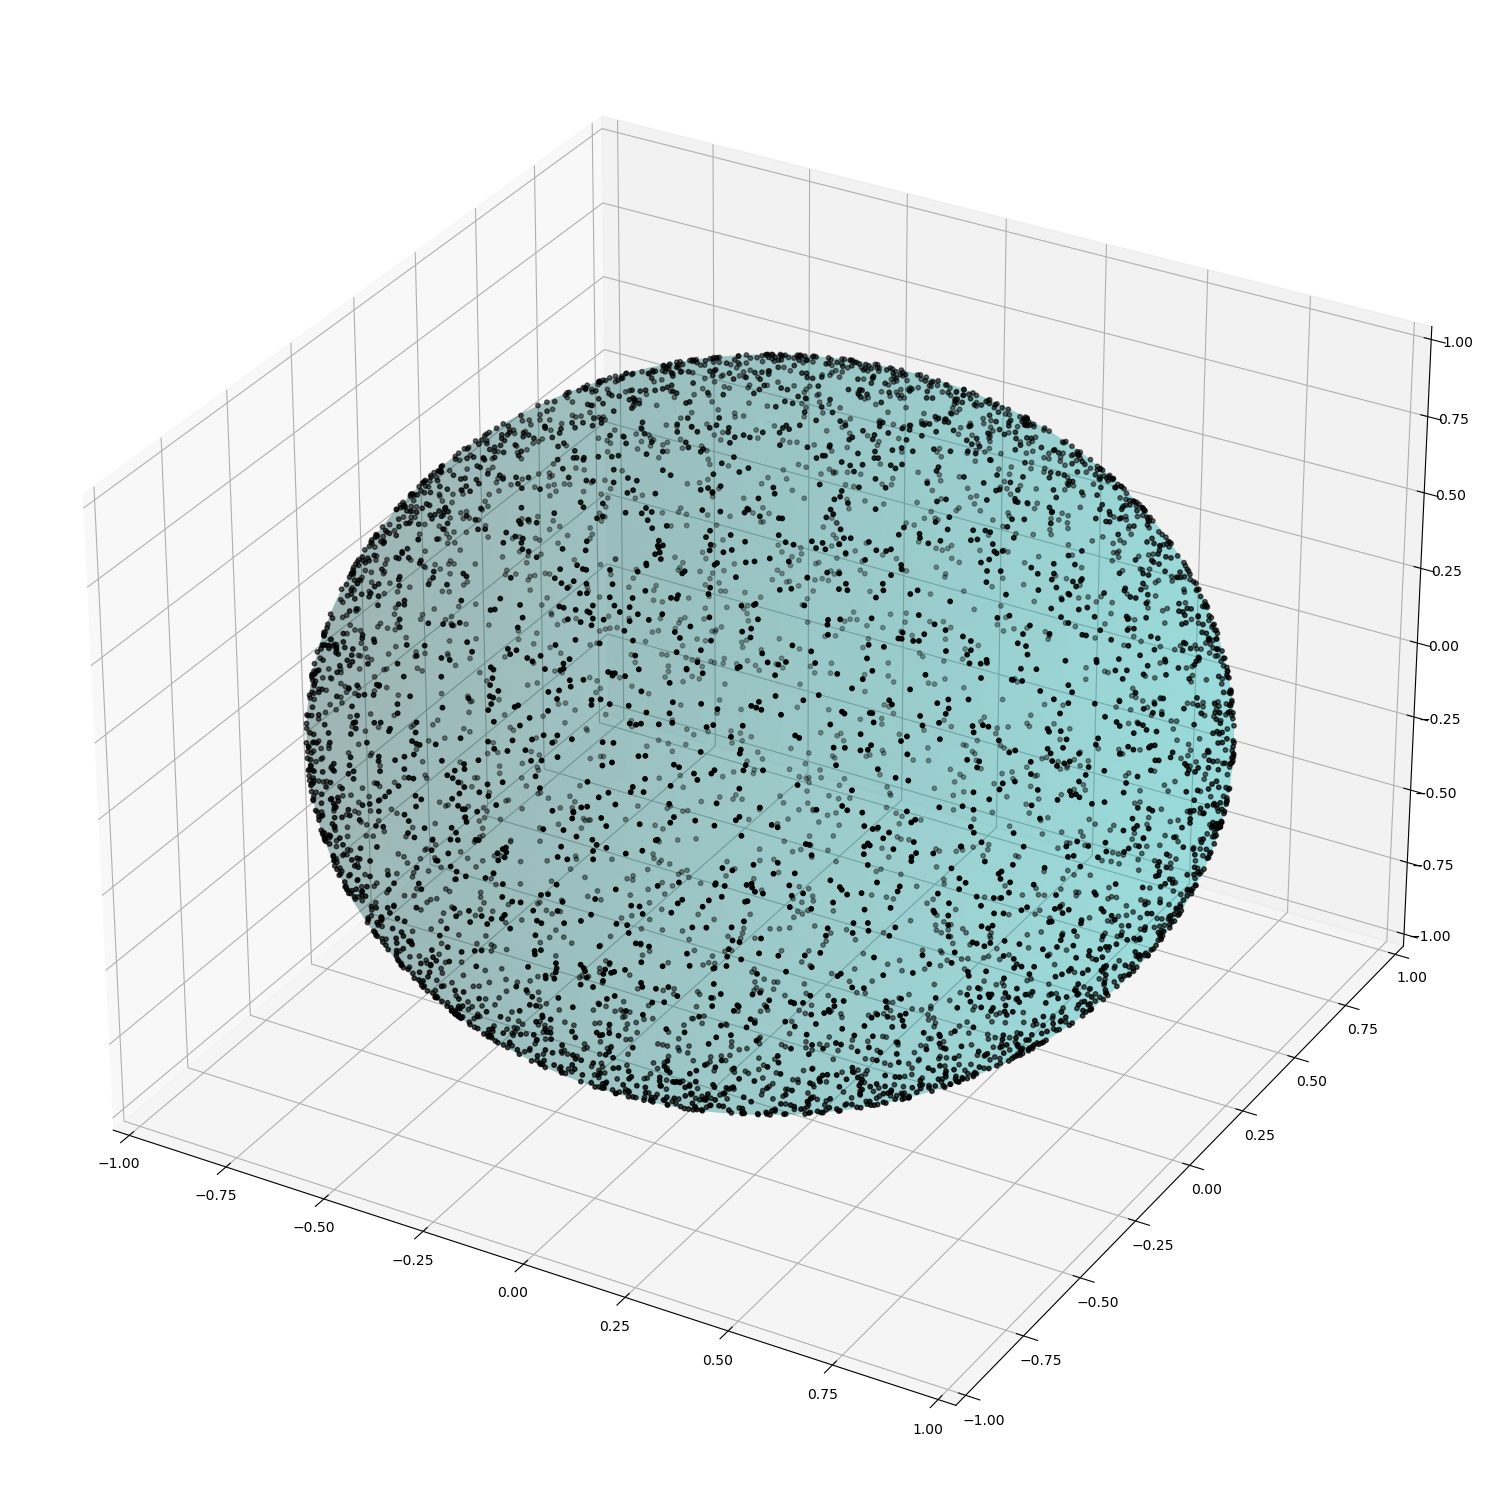

In [6]:
%matplotlib widget
#Set colours and render
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig,auto_add_to_figure=False)

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.2, linewidth=0)

ax.scatter(xx,yy,zz,color="k",s=10)

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
fig.add_axes(ax)
plt.show()